<a href="https://colab.research.google.com/github/Ganeshwalimbe/Mobile-price-prediction-/blob/main/Mobile_price_prediction_capstone_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

# **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**
**Data Description -**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [97]:
#importing packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [98]:
#importing dataset
data=pd.read_csv("/content/drive/MyDrive/AlmaBetter /Capstone projects /ml project 2/data_mobile_price_range.csv")

In [99]:
#print top 5 rows 
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [100]:
#cheking if missing values present in data 
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [101]:
#cheking if duplicate values present in data 
data.duplicated().sum()

0

In [104]:
variables=data.columns.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


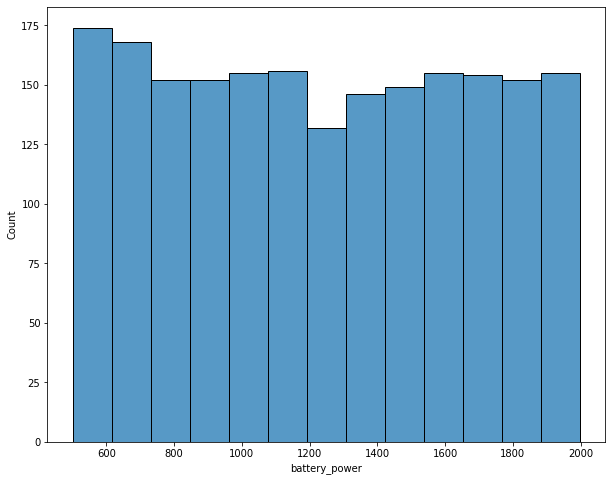

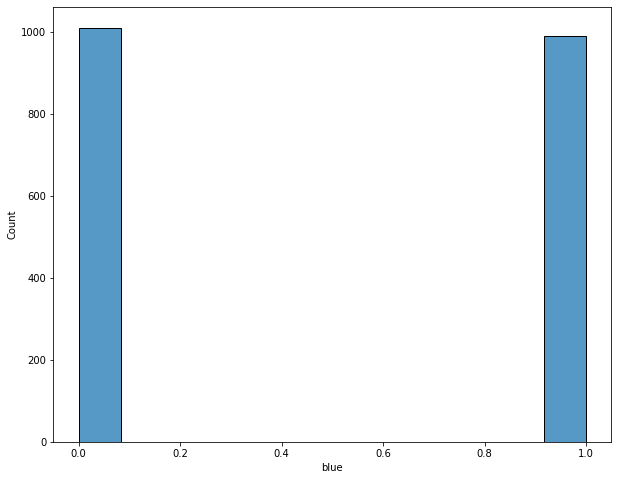

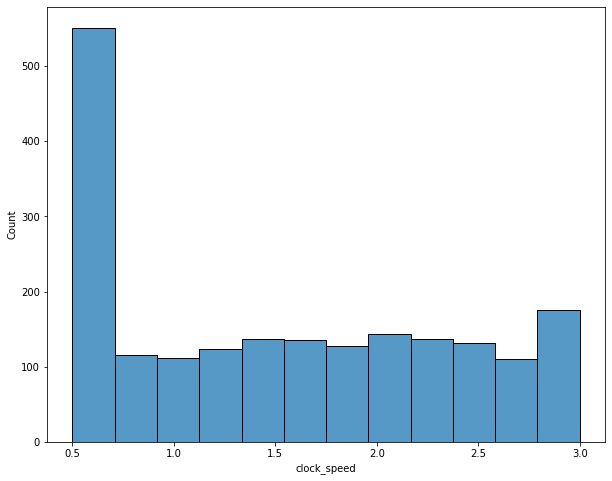

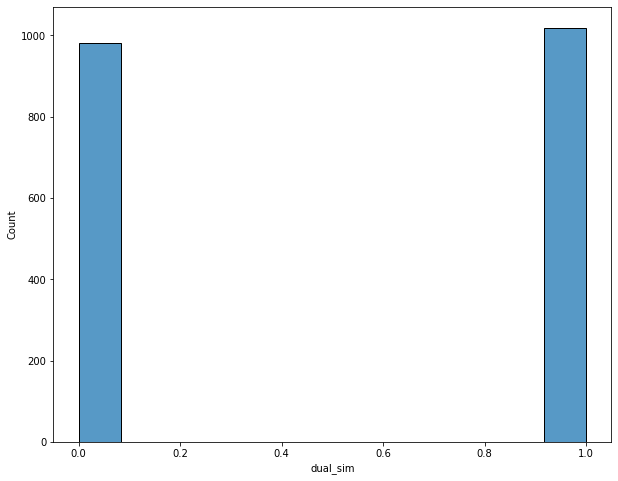

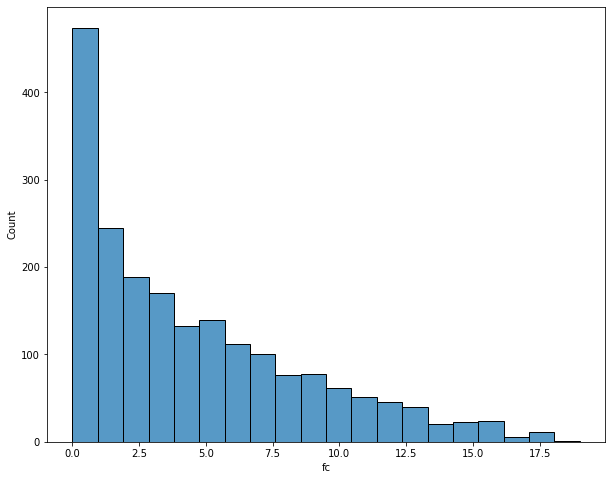

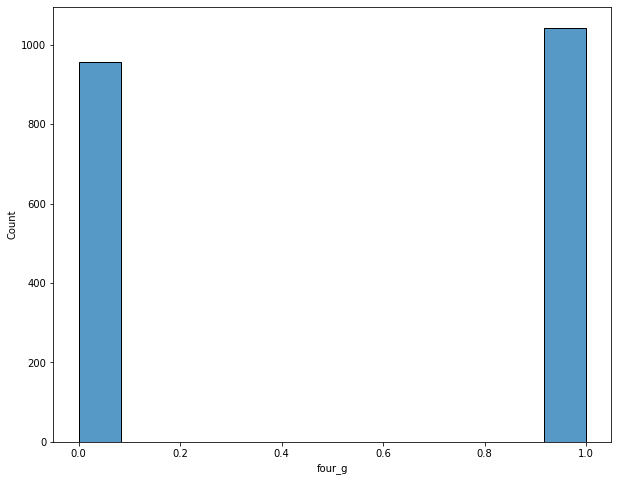

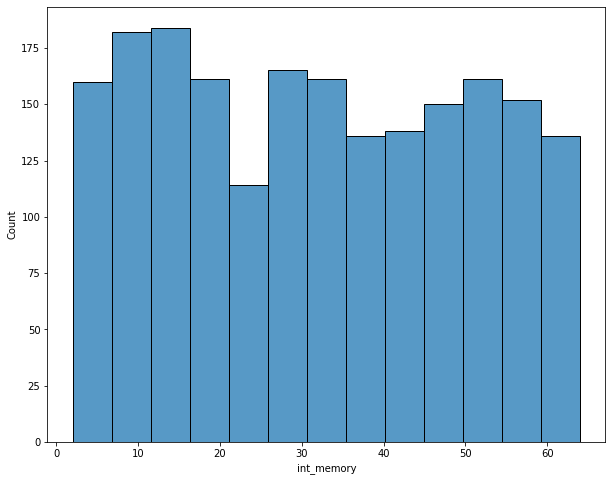

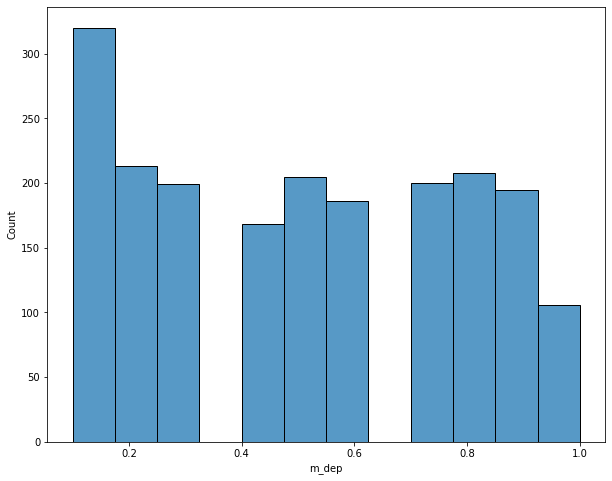

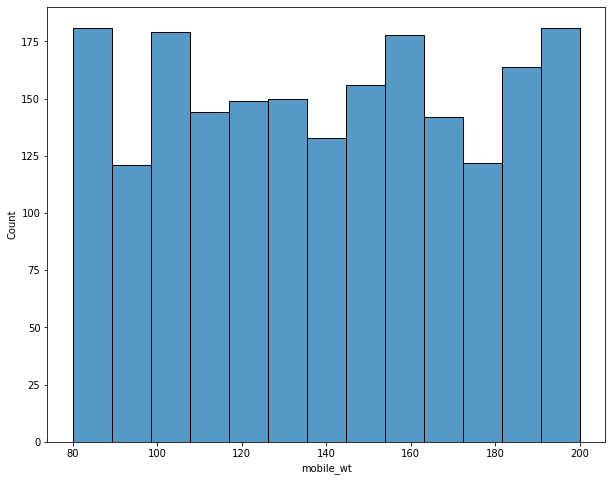

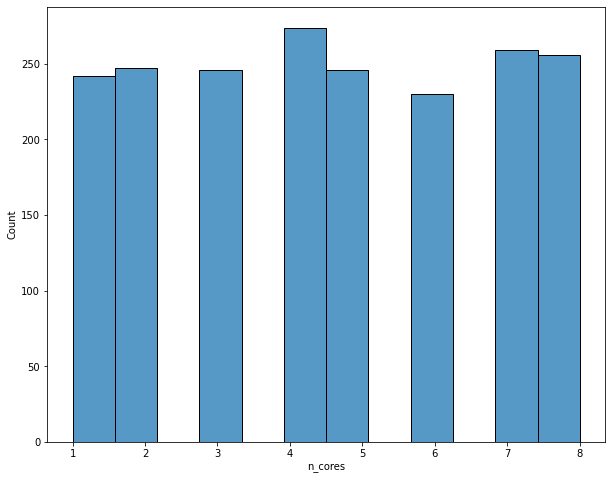

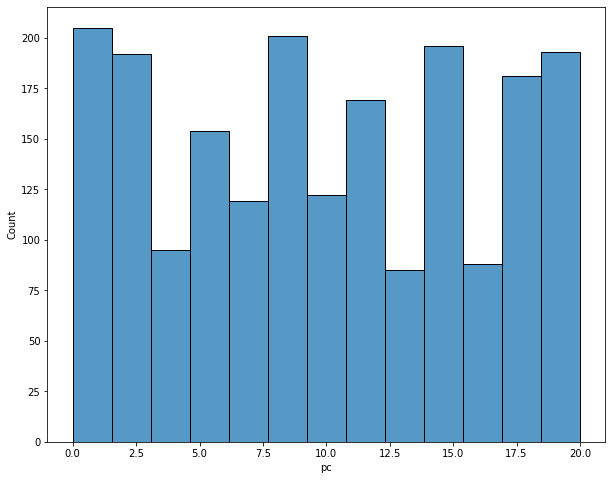

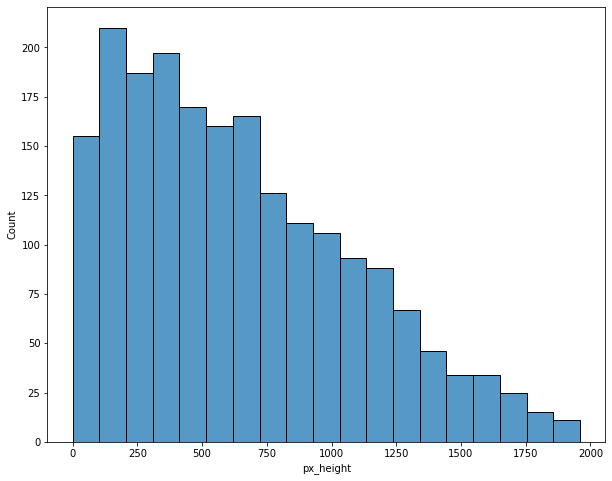

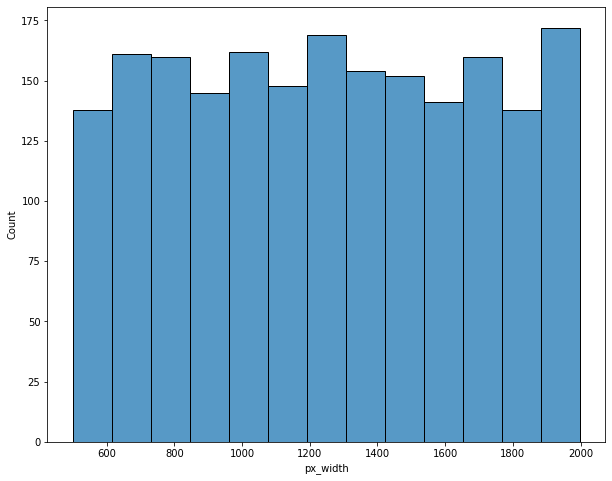

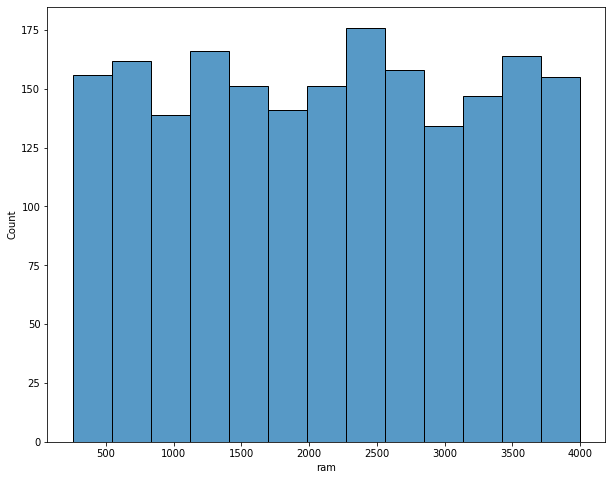

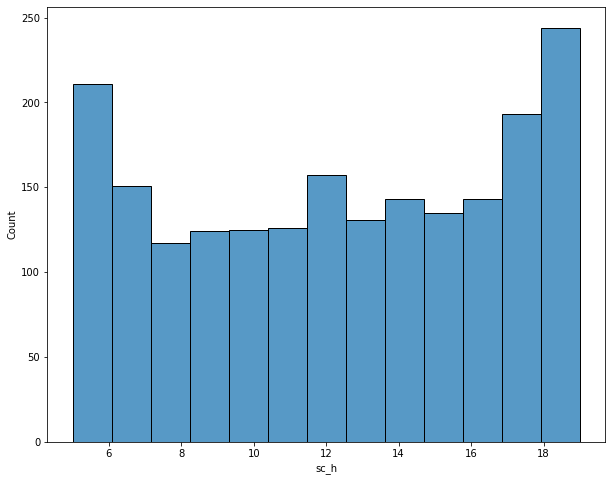

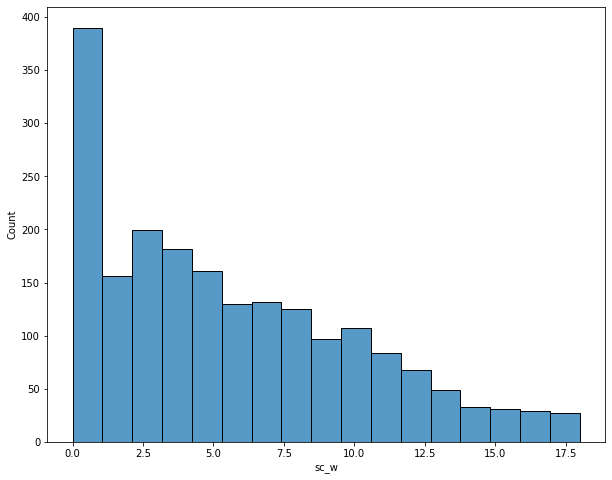

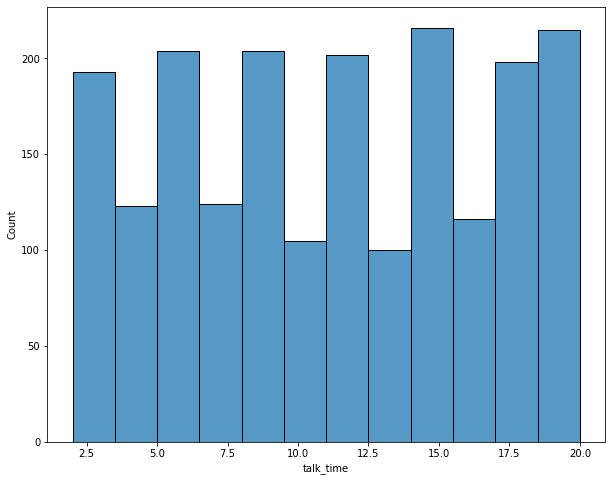

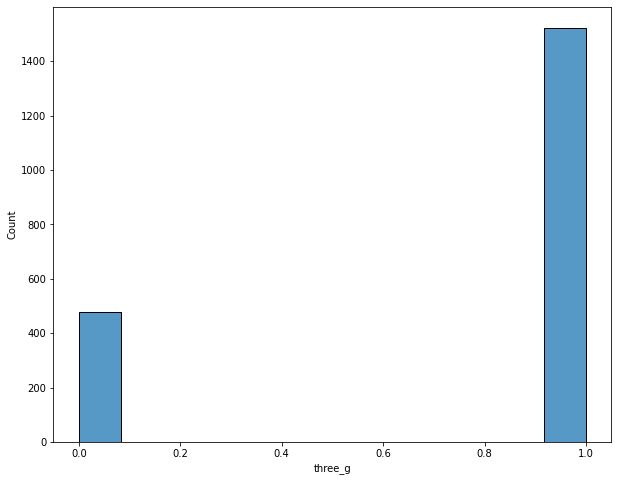

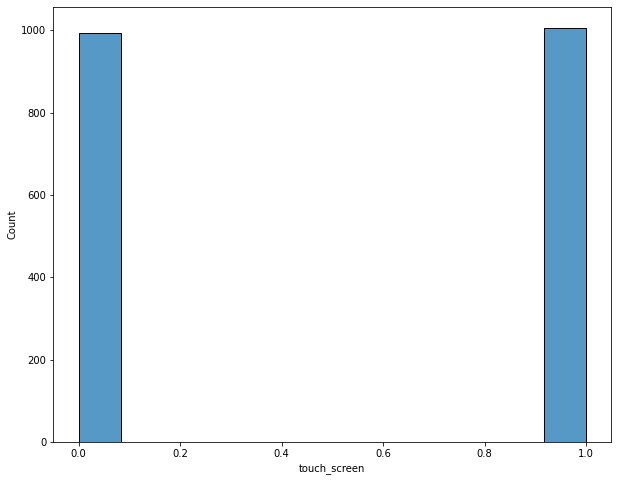

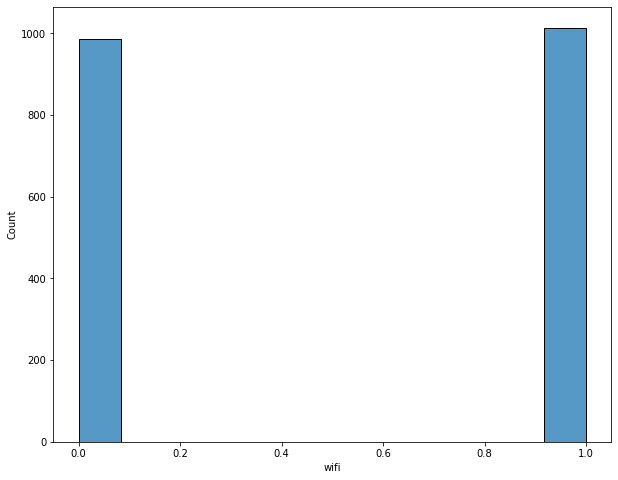

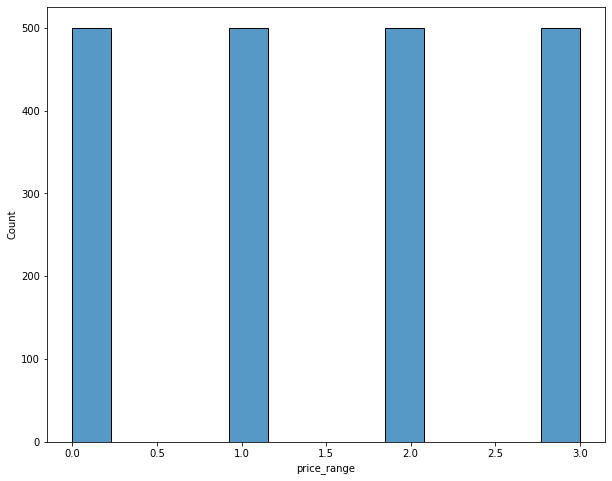

In [105]:
#plotting histogram of all variables 
for i in range(len(variables)):
  fig,ax=plt.subplots(figsize=(10,8))
  sns.histplot(data=data,x=variables[i],ax=ax)

plt.show()


[Text(0.5, 1.0, 'price v/s ram')]

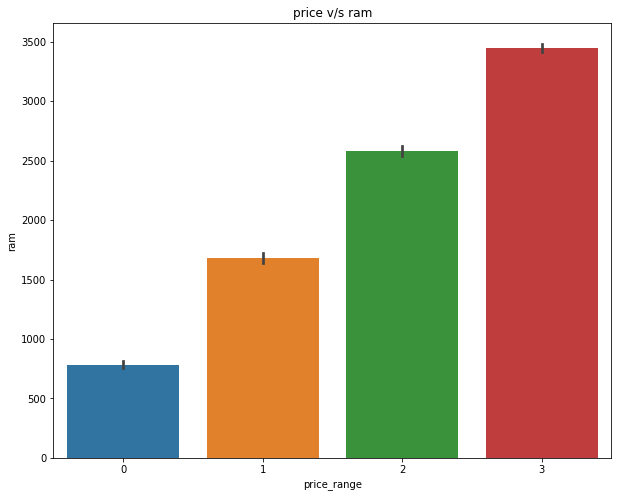

In [107]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='ram',x='price_range',ax=ax)
ax.set(title='price v/s ram')

[Text(0.5, 1.0, 'price v/s battery power')]

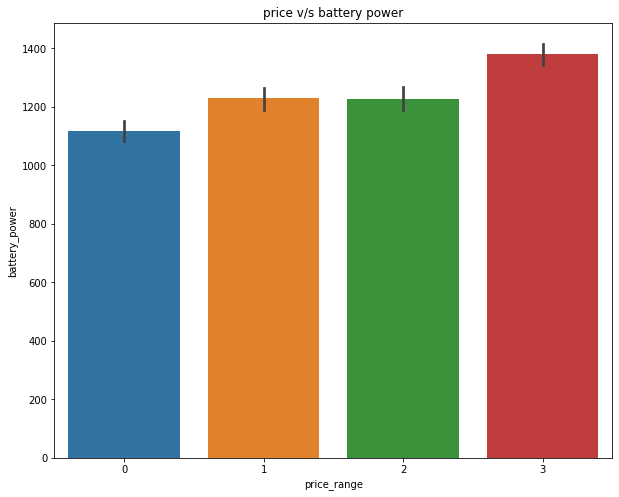

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='battery_power',x='price_range',ax=ax)
ax.set(title='price v/s battery power')

[Text(0.5, 1.0, 'price v/s internal memory')]

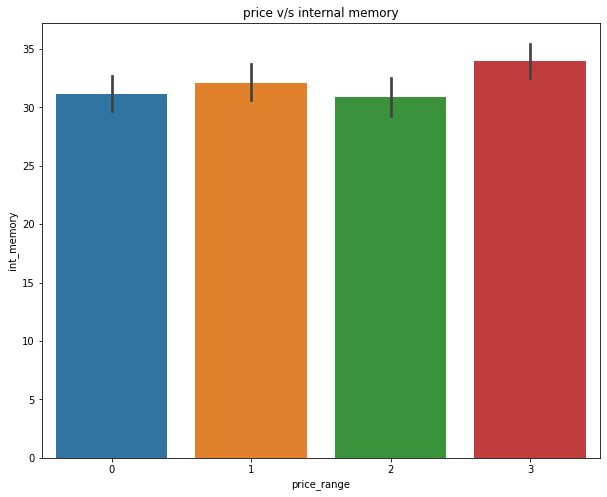

In [11]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='int_memory',x='price_range',ax=ax)
ax.set(title='price v/s internal memory')

[Text(0.5, 1.0, 'price range  v/s primary camera megapixel ')]

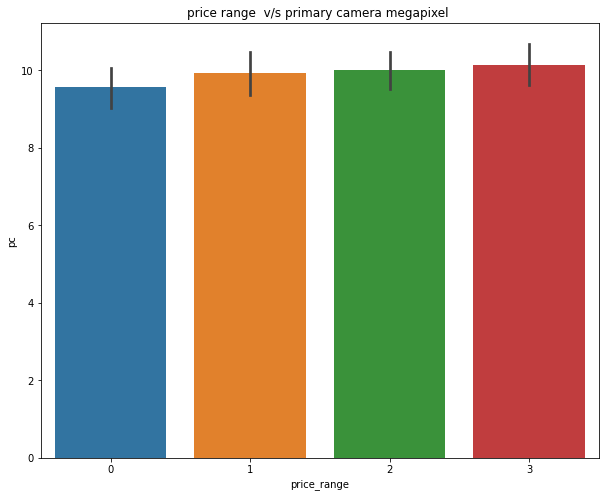

In [12]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='pc',x='price_range',ax=ax)
ax.set(title='price range  v/s primary camera megapixel ')

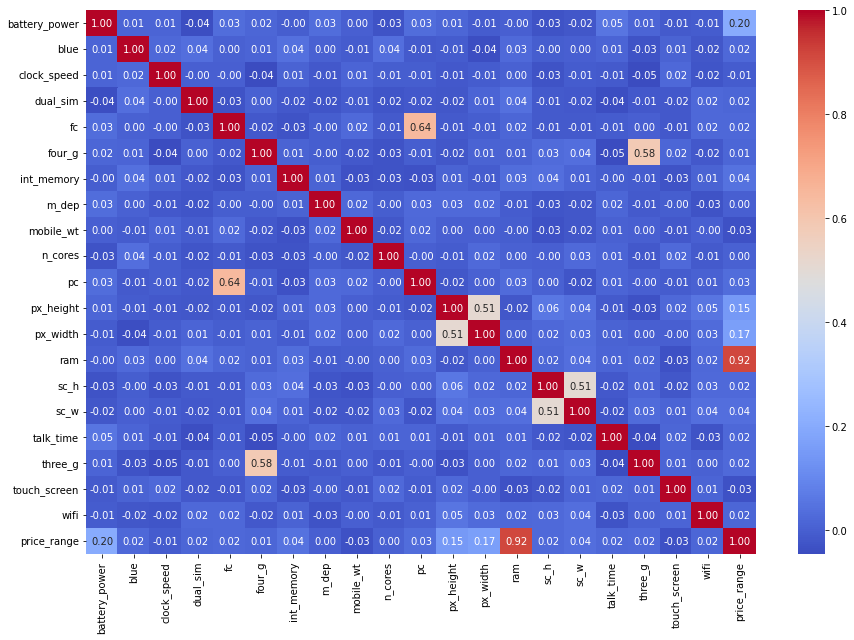

In [13]:
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [14]:
data=data.drop(['fc','three_g'],axis=1)

In [15]:
data['px_area']=data['px_height']*data['px_width']
data['sc_area']=data['sc_h']*data['sc_w']

In [16]:
data=data.drop(['px_height','px_width','sc_h','sc_w'],axis=1)

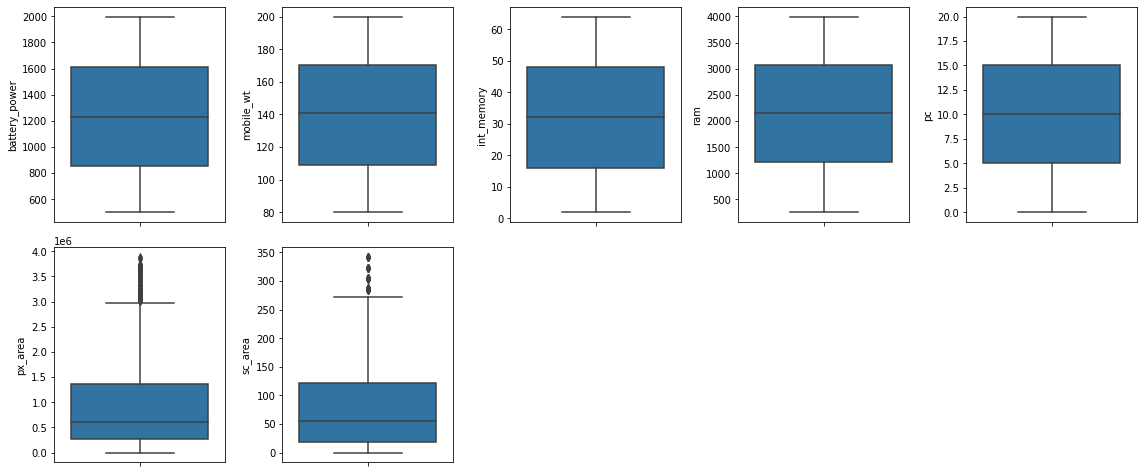

In [17]:
fig = plt.figure(figsize=(16,30))
features=['battery_power','mobile_wt','int_memory','ram','pc','px_area','sc_area']

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=data[features[i]])
plt.tight_layout()
plt.show()

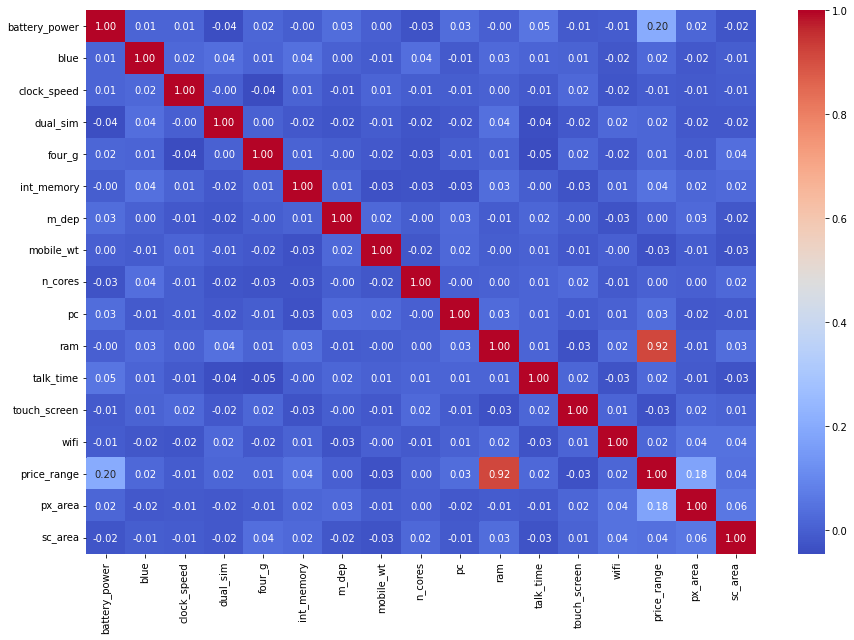

In [18]:
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [19]:
X=data.drop('price_range',axis=1)
y=data['price_range']

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 16)
(400, 16)


In [21]:
y_train.value_counts()

1    408
0    405
2    401
3    386
Name: price_range, dtype: int64

# **Logistic regression**

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [23]:
clf.coef_

array([[ 5.36298339e-04,  7.69169073e-05,  2.87414179e-04,
         8.65981971e-05,  8.83734581e-05,  5.03891033e-03,
         7.26489634e-05,  2.33378952e-02,  8.50029394e-04,
         1.54743899e-03, -3.13972629e-03,  1.67413318e-03,
         9.82739246e-05,  8.50513434e-05, -5.68211694e-07,
         1.50663221e-02],
       [ 4.06198231e-04,  2.29814641e-05,  7.01654940e-05,
         4.37353280e-05,  3.51617634e-05,  1.97491230e-03,
         3.68419792e-05,  7.16580062e-03, -3.38168216e-05,
         6.14706041e-04, -3.52800580e-04,  6.91357012e-04,
         3.65736985e-05,  3.06857141e-05,  2.32070248e-08,
         7.63744728e-04],
       [-3.96506689e-04, -2.60094892e-05, -6.79571083e-05,
        -3.01808633e-05, -4.28556514e-05, -1.86106118e-03,
        -1.67710240e-05, -1.53615635e-03, -1.13236378e-05,
        -2.96492654e-04,  9.96425135e-04, -4.40637300e-04,
        -3.98559093e-05, -1.38102601e-05,  7.62907473e-08,
        -4.53984511e-03],
       [-5.45989874e-04, -7.38888822e

In [24]:
clf.intercept_

array([ 1.73419056e-04,  5.10791377e-05, -3.35645427e-05, -1.90933651e-04])

In [25]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [26]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [27]:
test_preds

array([0.00759608, 0.17741958, 0.35111751, 0.4358254 , 0.02702667,
       0.40369874, 0.43749767, 0.08014372, 0.10072083, 0.39068223,
       0.4628539 , 0.01073107, 0.5041643 , 0.55215684, 0.06697151,
       0.14795143, 0.00297462, 0.35739913, 0.29250502, 0.50315653,
       0.47073862, 0.08483927, 0.01628495, 0.23469261, 0.56663181,
       0.19894802, 0.0445401 , 0.38974044, 0.00640058, 0.26629245,
       0.25829716, 0.16636802, 0.52106429, 0.51188872, 0.19932011,
       0.00921254, 0.24414428, 0.3371858 , 0.02067112, 0.15436356,
       0.09596536, 0.12632056, 0.02379888, 0.00395664, 0.35446444,
       0.06007323, 0.16122384, 0.27704801, 0.00731192, 0.46491549,
       0.59153066, 0.07077875, 0.22133929, 0.0846341 , 0.02193498,
       0.03221969, 0.01870025, 0.36984879, 0.08362684, 0.00750455,
       0.1386605 , 0.44881138, 0.0639905 , 0.44704353, 0.42537202,
       0.01393993, 0.02446871, 0.02961858, 0.36258959, 0.40152989,
       0.02253196, 0.12700832, 0.57176346, 0.45818535, 0.57426

In [28]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [29]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [30]:
train_class_preds

array([0, 1, 3, ..., 3, 0, 3])

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [32]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.61
The accuracy on test data is  0.61


[[302  89  14   0]
 [ 69 191 113  35]
 [  5  92 181 123]
 [  0   8  76 302]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

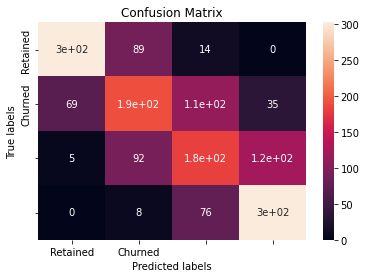

In [33]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [34]:
from sklearn import metrics

In [35]:
#evaluation metrics of logistic regression
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        87
           1       0.57      0.54      0.55        97
           2       0.40      0.43      0.41        94
           3       0.69      0.65      0.67       122

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400



In [36]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [37]:
logistic = LogisticRegression()

In [38]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.420, test=0.450) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.459, test=0.453) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

[CV] END ................ accuracy: (train=0.457, test=0.431) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.466, test=0.475) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.477, test=0.450) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

In [39]:
scores['train_accuracy']

array([0.4203125 , 0.45859375, 0.45703125, 0.46640625, 0.4765625 ])

In [40]:
#cheking accuracy of the logistic regression after cross validation and hyperparamter tunning
scores['test_accuracy']

array([0.45    , 0.453125, 0.43125 , 0.475   , 0.45    ])

In [41]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [42]:
for model in scores['estimator']:
    print(model.coef_)

[[ 1.34528411e-03  8.20752471e-07  2.73021823e-06  8.57186488e-07
   7.82472822e-07  4.85385499e-05  7.41534812e-07  2.37130177e-04
   7.80168736e-06  1.52857215e-05 -1.37864160e-03  1.80547332e-05
   9.63816271e-07  7.96752203e-07  1.48330413e-07  1.37431370e-04]
 [ 5.95260223e-04  2.71245415e-07  7.57149223e-07  3.38704844e-07
   4.44701766e-07  1.58391254e-05  3.80752769e-07  7.65330840e-05
   9.17811316e-07  6.28258405e-06 -9.11065232e-05  6.87983293e-06
   3.60122246e-07  3.42902678e-07 -1.42253066e-07  2.55862304e-05]
 [-5.94379376e-04 -2.71403915e-07 -7.98930953e-07 -3.28746066e-07
  -3.83326914e-07 -1.83678689e-05 -2.72348072e-07 -5.14650451e-05
  -1.29315678e-06 -3.87857153e-06  5.98164518e-04 -5.88936918e-06
  -3.73950803e-07 -1.83841223e-07 -1.18479713e-07 -2.94275148e-05]
 [-1.34616496e-03 -8.20593970e-07 -2.68843650e-06 -8.67145266e-07
  -8.43847674e-07 -4.60098063e-05 -8.49939509e-07 -2.62198216e-04
  -7.42634189e-06 -1.76897340e-05  8.71583610e-04 -1.90451969e-05
  -9.49

# **Decision trees**

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
price_classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
price_classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [45]:
y_predicted_dt = price_classifier_dt.predict(X_test)

In [46]:
y_predicted_dt[:10]

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1])

In [47]:
accuracy_score(y_test, y_predicted_dt) * 100

78.0

In [48]:
data.iloc[-1]

battery_power       510.0
blue                  1.0
clock_speed           2.0
dual_sim              1.0
four_g                1.0
int_memory           45.0
m_dep                 0.9
mobile_wt           168.0
n_cores               6.0
pc                   16.0
ram                3919.0
talk_time             2.0
touch_screen          1.0
wifi                  1.0
price_range           3.0
px_area          364182.0
sc_area              76.0
Name: 1999, dtype: float64

In [49]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

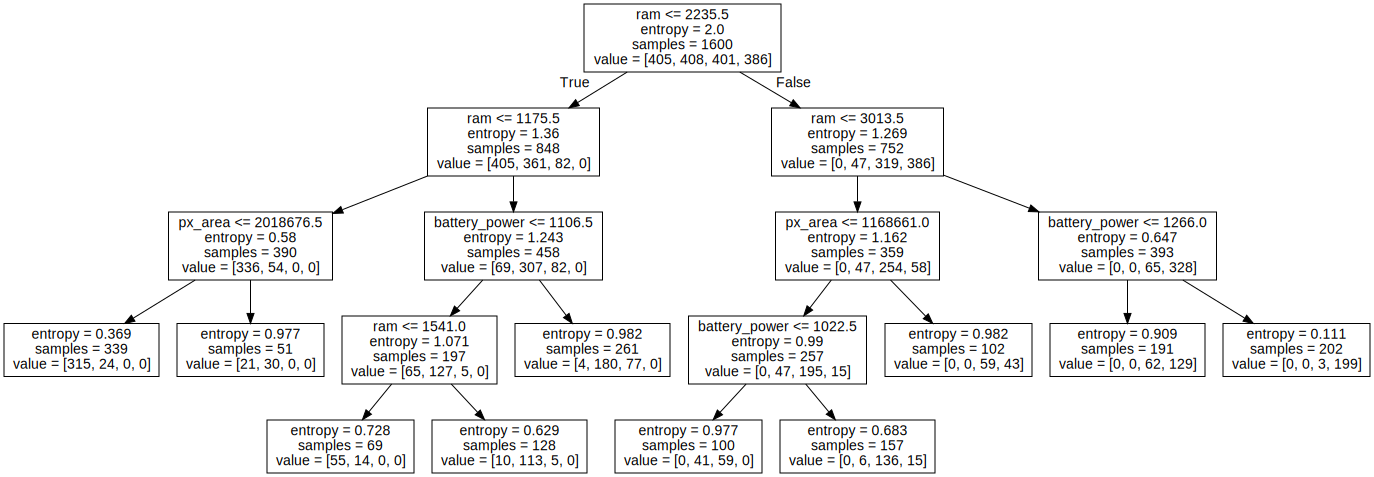

In [50]:
graph = Source(tree.export_graphviz(price_classifier_dt, out_file=None
   , feature_names=X_train.columns))
display(SVG(graph.pipe(format='svg')))

In [51]:
#decision tree classifier evaluation metrics
print(metrics.classification_report(y_predicted_dt, y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       100
           1       0.73      0.69      0.71        97
           2       0.52      0.67      0.58        76
           3       0.91      0.82      0.86       127

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.80      0.78      0.79       400



# ***Random forest classifier ***

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [54]:
train_preds_rf =  rf.predict(X_train)
test_preds_rf  = rf.predict(X_test)

In [55]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds_rf)

1.0

In [56]:
# Obtain accuracy on testing set
accuracy_score(y_test,test_preds_rf)

0.88

In [57]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [58]:
y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [59]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        99
           1       0.80      0.85      0.83        87
           2       0.78      0.81      0.79        95
           3       0.95      0.91      0.93       119

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [110]:
rf.feature_importances_

array([0.08499632, 0.0073678 , 0.02843509, 0.00658366, 0.00669156,
       0.03886608, 0.02496683, 0.04165283, 0.02223999, 0.03086121,
       0.54112648, 0.03202229, 0.00679795, 0.00645098, 0.08186645,
       0.03907449])

In [113]:
#finding important factors 
importances = rf.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [115]:
importance_df = pd.DataFrame(importance_dict)

In [132]:
descending_importance_df=importance_df.sort_values('Feature Importance',ascending=True)
descending_importance_df

,Feature,Feature Importance
13,wifi,0.006451
3,dual_sim,0.006584
4,four_g,0.006692
12,touch_screen,0.006798
1,blue,0.007368
8,n_cores,0.022240
6,m_dep,0.024967
2,clock_speed,0.028435
9,pc,0.030861
11,talk_time,0.032022


<BarContainer object of 16 artists>

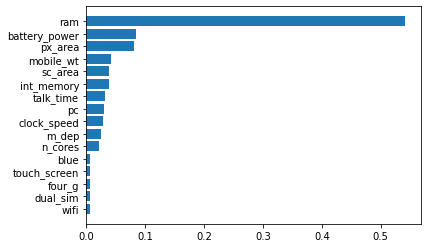

In [133]:
plt.barh('Feature','Feature Importance',data=descending_importance_df)

In [60]:
# Hyperparameter tuning

classifier = RandomForestClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [61]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [62]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

0.840625

In [63]:
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

0.8075

In [108]:
print(metrics.classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       103
           1       0.74      0.71      0.72        96
           2       0.61      0.70      0.65        86
           3       0.89      0.89      0.89       115

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.82      0.81      0.81       400



# **Naive Bayes classifier**

In [64]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train,y_train)

In [65]:
train_preds_nb =  NB.predict(X_train)
test_preds_nb = NB.predict(X_test)

In [66]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds_nb)

0.796875

In [67]:
# Obtain accuracy on testing set
accuracy_score(y_test,test_preds_nb)

0.8125

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_preds_nb))
print(confusion_matrix(y_test,test_preds_nb))

[[361  44   0   0]
 [ 40 290  78   0]
 [  0  71 288  42]
 [  0   0  50 336]]
[[ 86   9   0   0]
 [  6  68  18   0]
 [  0  15  66  18]
 [  0   0   9 105]]


In [70]:
# Print the classification report for train 
print(classification_report(y_train,train_preds_nb))


              precision    recall  f1-score   support

           0       0.90      0.89      0.90       405
           1       0.72      0.71      0.71       408
           2       0.69      0.72      0.71       401
           3       0.89      0.87      0.88       386

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.74      0.74      0.74        92
           2       0.71      0.67      0.69        99
           3       0.85      0.92      0.89       114

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [134]:
#printing evaluaton metrics of naive bayes classifier
print(classification_report(y_test,test_preds_nb))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.74      0.74      0.74        92
           2       0.71      0.67      0.69        99
           3       0.85      0.92      0.89       114

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



# ***k nearest neighborer classifier ***

In [71]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

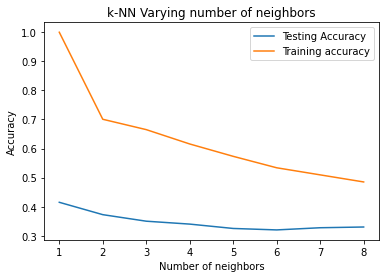

In [72]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [73]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [74]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [75]:
knn.score(X_test,y_test)

0.3275

In [76]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [77]:
# Let us get the predictions using the classifier we had fit above
y_pred_kn = knn.predict(X_test)

In [78]:
confusion_matrix(y_test,y_pred)

array([[73, 22,  0,  0],
       [12, 52, 21,  7],
       [ 2, 21, 40, 36],
       [ 0,  2, 33, 79]])

In [79]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label=1)

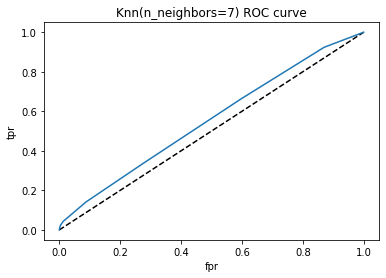

In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [82]:
#printing evaluation metrics for knn classifier 
print(metrics.classification_report(y_pred_kn, y_test))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46       131
           1       0.29      0.24      0.26       114
           2       0.29      0.33      0.31        88
           3       0.20      0.34      0.25        67

    accuracy                           0.33       400
   macro avg       0.33      0.33      0.32       400
weighted avg       0.36      0.33      0.34       400

